In [1]:
#Bibliotecas
import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pickle
#import hdbscan
from scipy.signal import butter, sosfiltfilt, find_peaks

#from utiles import spike_reducer

In [2]:
def SpikeDetector(time_series, alpha, th_method = 1, distance=1):
    th = 0
    if th_method == 1:
        ## Standard deviation calculus
        th = alpha * np.std(time_series)
    elif th_method == 2:
        abs_time_series = np.abs(time_series)/0.6745
        th = 4 * np.median(abs_time_series)
    else:
        print("Ingresa una opción válida")
    if th != 0:  
        peaks, _ = find_peaks(-1*time_series, height = th, distance=1)
        
        trimmed_peaks_matrix = np.zeros((peaks.shape[0], 31))
        delete_elec = []
        for i in range(len(peaks)):
            cut = time_series[peaks[i]-10: peaks[i]+21]
            try:
                trimmed_peaks_matrix[i] = cut
            except ValueError:# esta al final o inicio y no tiene 31 valores 
                print("Value Error: {}".format(peaks[i]))
                delete_elec.append(i)
        
        for elec in delete_elec:
            np.delete(peaks, elec)
        
        print("Se obtuvieron {} spikes.".format(len(peaks)))

        return trimmed_peaks_matrix, peaks, th;

In [3]:
mea_elec = {
    'F7'  : 1,  'F6'  : 31, 'G6'  : 61, 'G7'  : 91,
    'F8'  : 2,  'E6'  : 32, 'G5'  : 62, 'H7'  : 92,
    'F12' : 3,  'A6'  : 33, 'G1'  : 63, 'M7'  : 93,
    'F11' : 4,  'B6'  : 34, 'G2'  : 64, 'L7'  : 94,
    'F10' : 5,  'C6'  : 35, 'G3'  : 65, 'K7'  : 95,
    'F9'  : 6,  'D6'  : 36, 'G4'  : 66, 'J7'  : 96,
    'E12' : 7,  'A5'  : 37, 'H1'  : 67, 'M8'  : 97,
    'E11' : 8,  'B5'  : 38, 'H2'  : 68, 'L8'  : 98,
    'E10' : 9,  'C5'  : 39, 'H3'  : 69, 'K8'  : 99,
    'E9'  : 10, 'D5'  : 40, 'H4'  : 70, 'J8'  : 100,
    'D12' : 11, 'A4'  : 41, 'J1'  : 71, 'M9'  : 101,
    'D11' : 12, 'B4'  : 42, 'J2'  : 72, 'L9'  : 102,
    'D10' : 13, 'C4'  : 43, 'J3'  : 73, 'K9'  : 103,
    'D9'  : 14, 'D4'  : 44, 'J4'  : 74, 'J9'  : 104,
    'C11' : 15, 'B3'  : 45, 'K2'  : 75, 'L10' : 105,
    'C10' : 16, 'C3'  : 46, 'K3'  : 76, 'K10' : 106,
    'B10' : 17, 'C2'  : 47, 'L3'  : 77, 'K11' : 107,
    'E8'  : 18, 'E5'  : 48, 'H5'  : 78, 'H8'  : 108,
    'C9'  : 19, 'D3'  : 49, 'K4'  : 79, 'J10' : 109,
    'B9'  : 20, 'D2'  : 50, 'L4'  : 80, 'J11' : 110,
    'A9'  : 21, 'D1'  : 51, 'M4'  : 81, 'J12' : 111,
    'D8'  : 22, 'E4'  : 52, 'J5'  : 82, 'H9'  : 112,
    'C8'  : 23, 'E3'  : 53, 'K5'  : 83, 'H10' : 113,
    'B8'  : 24, 'E2'  : 54, 'L5'  : 84, 'H11' : 114,
    'A8'  : 25, 'E1'  : 55, 'M5'  : 85, 'H12' : 115,
    'D7'  : 26, 'F4'  : 56, 'J6'  : 86, 'G9'  : 116,
    'C7'  : 27, 'F3'  : 57, 'K6'  : 87, 'G10' : 117,
    'B7'  : 28, 'F2'  : 58, 'L6'  : 88, 'G11' : 118,
    'A7'  : 29, 'F1'  : 59, 'M6'  : 89, 'G12' : 119,
    'E7'  : 30, 'F5'  : 60, 'H6'  : 90, 'G8'  : 120,
}

In [4]:
keys_elec = list(mea_elec.keys())

neighboors_dict = {}
neighboors = []

for i in range(len(keys_elec)):
    s = 1
    if keys_elec[i][0] == 'H':
        s = 2

    R = "".join((chr(ord(keys_elec[i][0])+s), str(int(keys_elec[i][1:]))))
    if not(R in keys_elec):
        R = 'X'
    
    U = "".join((keys_elec[i][0], str(int(keys_elec[i][1:]) - 1)))
    if not(U in keys_elec):
        U = 'X'
        
    RU = "".join((chr(ord(keys_elec[i][0])+s), str(int(keys_elec[i][1:]) - 1)))
    if not(RU in keys_elec):
        RU = 'X'
    
    RD = "".join((chr(ord(keys_elec[i][0])+s), str(int(keys_elec[i][1:]) + 1)))
    if not(RD in keys_elec):
        RD = 'X'
    
    
    s = 1
    if keys_elec[i][0] == 'J':
        s = 2
        
    L = "".join((chr(ord(keys_elec[i][0])-s), str(int(keys_elec[i][1:]))))
    if not(L in keys_elec):
        L = 'X'

    D = "".join((keys_elec[i][0], str(int(keys_elec[i][1:]) + 1)))
    if not(D in keys_elec):
        D = 'X'
    
    LU = "".join((chr(ord(keys_elec[i][0])-s), str(int(keys_elec[i][1:]) - 1)))
    if not(LU in keys_elec):
        LU = 'X'
    
    LD = "".join((chr(ord(keys_elec[i][0])-s), str(int(keys_elec[i][1:]) + 1)))
    if not(LD in keys_elec):
        LD = 'X'
    
    neighboors_dict[keys_elec[i]] = [R, RU, U, LU, L, LD, D, RD]

In [ ]:
mea_elec.keys()

In [6]:
# C H A R G E   F I L E
path_file = "C:\\Users\\++++++++\\Desktop\\+++++++\\++++++++++++.h5"

file = h5py.File(path_file)

index_elec = {}
info_channel = file['Data']['Recording_0']['AnalogStream']['Stream_0']['InfoChannel']
name_channel = ''
for i in range(0, len(info_channel)):
    name_channel = info_channel[i][4].decode('UTF-8')
    index_elec[name_channel] = i

In [ ]:
index_elec

In [ ]:
'''  'C4', 'C5', 'C6', 'C7', 'D5', 'E6', 'E9', 'L6', 'L8'  '''


list_elec = list(index_elec.keys())




dict_elec = {}
for electrode in list_elec:
    print("{} e:{}".format(electrode, mea_elec[electrode]))
    raw_signal = np.array(file['Data']['Recording_0']['AnalogStream']['Stream_0']['ChannelData'][index_elec[electrode]])

    ## Filtering the raw signal
    sos = butter(4, [400, 3500], 'bp', output='sos', fs = 10000)
    time_series = sosfiltfilt(sos, raw_signal)

    segments, peaks, std_th = SpikeDetector(time_series, alpha= 5, th_method = 2, distance=1)
    #segments, peaks, std_th = SpikeDetector(raw_signal, alpha= 5, th_method = 2, distance=1)
    dict_elec[electrode]={'segments' : segments, 
                          'ts':peaks, 
                          'clusters' : np.zeros(segments.shape[0]),
                          'umap' : np.zeros(segments.shape[0])}

In [9]:
from collections import Counter

counter = Counter()

aux_concat = []
for electrode in list_elec:
    aux_concat = np.concatenate([aux_concat, dict_elec[electrode]['ts']])

counter = Counter(aux_concat)

In [ ]:
dict_elec[R]['segments'][repeated_R][5:11]

In [11]:
C = central_elec = 'L6'
repeated = int(counter.most_common()[0][0])

colors = ['black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black']

R, RU, U, LU, L, LD, D, RD = neighboors_dict[central_elec]

amps = np.zeros(9,)

repeated_C = int(np.where(dict_elec[C]['ts'] == repeated)[0][0])
repeated_R = int(np.where(dict_elec[R]['ts'] == repeated)[0][0])
R_corr = np.corrcoef(dict_elec[C]['segments'][repeated_C], dict_elec[R]['segments'][repeated_R])[0,1]
amps[0] = np.max(dict_elec[R]['segments'][repeated_R][5:10]) - dict_elec[R]['segments'][repeated_R][11]

repeated_C = int(np.where(dict_elec[C]['ts'] == repeated)[0][0])
repeated_RU = int(np.where(dict_elec[RU]['ts'] == repeated)[0][0])
RU_corr = np.corrcoef(dict_elec[C]['segments'][repeated_C], dict_elec[RU]['segments'][repeated_RU])[0,1]
amps[1] = np.max(dict_elec[RU]['segments'][repeated_RU][5:10]) - dict_elec[RU]['segments'][repeated_RU][11]

repeated_C = int(np.where(dict_elec[C]['ts'] == repeated)[0][0])
repeated_U = int(np.where(dict_elec[U]['ts'] == repeated)[0][0])
U_corr = np.corrcoef(dict_elec[C]['segments'][repeated_C], dict_elec[U]['segments'][repeated_U])[0,1]
amps[2] = np.max(dict_elec[U]['segments'][repeated_U][5:10]) - dict_elec[U]['segments'][repeated_U][11]

repeated_C = int(np.where(dict_elec[C]['ts'] == repeated)[0][0])
repeated_LU = int(np.where(dict_elec[LU]['ts'] == repeated)[0][0])
LU_corr = np.corrcoef(dict_elec[C]['segments'][repeated_C], dict_elec[LU]['segments'][repeated_LU])[0,1]
amps[3] = np.max(dict_elec[LU]['segments'][repeated_LU][5:10]) - dict_elec[LU]['segments'][repeated_LU][11]

repeated_C = int(np.where(dict_elec[C]['ts'] == repeated)[0][0])
repeated_L = int(np.where(dict_elec[L]['ts'] == repeated)[0][0])
L_corr = np.corrcoef(dict_elec[C]['segments'][repeated_C], dict_elec[L]['segments'][repeated_L])[0,1]
amps[4] = np.max(dict_elec[L]['segments'][repeated_L][5:10]) - dict_elec[L]['segments'][repeated_L][11]

repeated_C = int(np.where(dict_elec[C]['ts'] == repeated)[0][0])
repeated_LD = int(np.where(dict_elec[LD]['ts'] == repeated)[0][0])
LD_corr = np.corrcoef(dict_elec[C]['segments'][repeated_C], dict_elec[LD]['segments'][repeated_LD])[0,1]
amps[5] = np.max(dict_elec[LD]['segments'][repeated_LD][5:10]) - dict_elec[LD]['segments'][repeated_LD][11]

repeated_C = int(np.where(dict_elec[C]['ts'] == repeated)[0][0])
repeated_D = int(np.where(dict_elec[D]['ts'] == repeated)[0][0])
D_corr = np.corrcoef(dict_elec[C]['segments'][repeated_C], dict_elec[D]['segments'][repeated_D])[0,1]
amps[6] = np.max(dict_elec[D]['segments'][repeated_D][5:10]) - dict_elec[D]['segments'][repeated_D][11]

repeated_C = int(np.where(dict_elec[C]['ts'] == repeated)[0][0])
repeated_RD = int(np.where(dict_elec[RD]['ts'] == repeated)[0][0])
RD_corr = np.corrcoef(dict_elec[C]['segments'][repeated_C], dict_elec[RD]['segments'][repeated_RD])[0,1]
amps[7] = np.max(dict_elec[RD]['segments'][repeated_RD][5:10]) - dict_elec[RD]['segments'][repeated_RD][11]

amps[8] = np.max(dict_elec[C]['segments'][repeated_C][5:10]) - dict_elec[C]['segments'][repeated_C][11]

colors[np.where(amps == np.max(amps))[0][0]] = 'green'

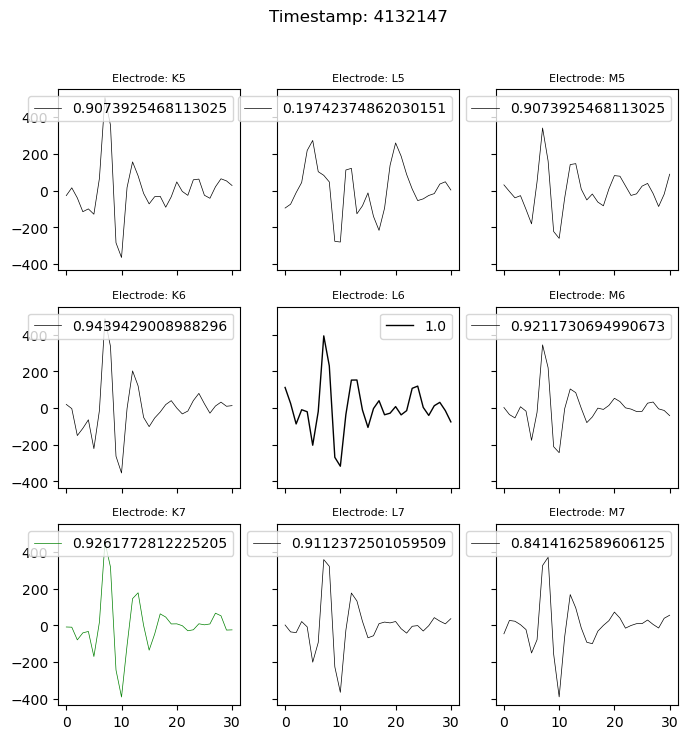

In [12]:
fig, axs = plt.subplots(3, 3, sharey=True, sharex=True, figsize=(8, 8))
plt.suptitle("Timestamp: {}".format(repeated))


## Gráfica superior izquierda
axs[0, 0].set_title("Electrode: {}".format(LU), fontsize = 8)
axs[0, 0].plot(dict_elec[LU]['segments'][repeated_LU], color = colors[3], lw=0.5, label = LU_corr)
axs[0, 0].legend()

## Gráfica superior 
axs[0, 1].set_title("Electrode: {}".format(U), fontsize = 8)
axs[0, 1].plot(dict_elec[U]['segments'][repeated_U], color = colors[2], lw=0.5, label = U_corr)
axs[0, 1].legend()

## Gráfica superior derecha
axs[0, 2].set_title("Electrode: {}".format(RU), fontsize = 8)
axs[0, 2].plot(dict_elec[RU]['segments'][repeated_RU], color = colors[1], lw=0.5, label = LU_corr)
axs[0, 2].legend()

## Gráfica izquierda
axs[1, 0].set_title("Electrode: {}".format(L), fontsize = 8)
axs[1, 0].plot(dict_elec[L]['segments'][repeated_L], color = colors[4], lw=0.5, label = L_corr)
axs[1, 0].legend()

## Gráfica central
axs[1, 1].set_title("Electrode: {}".format(C), fontsize = 8)
axs[1, 1].plot(dict_elec[C]['segments'][repeated_C], color = colors[8], lw=1, label = '1.0')
axs[1, 1].legend()

## Gráfica derecha
axs[1, 2].set_title("Electrode: {}".format(R), fontsize = 8)
axs[1, 2].plot(dict_elec[R]['segments'][repeated_R], color = colors[0], lw=0.5, label = R_corr)
axs[1, 2].legend()

## Gráfica inferior izquierda
axs[2, 0].set_title("Electrode: {}".format(LD), fontsize = 8)
axs[2, 0].plot(dict_elec[LD]['segments'][repeated_LD], color = colors[5], lw=0.5, label = LD_corr)
axs[2, 0].legend()

## Gráfica inferior
axs[2, 1].set_title("Electrode: {}".format(D), fontsize = 8)
axs[2, 1].plot(dict_elec[D]['segments'][repeated_D], color = colors[6], lw=0.5, label = D_corr)
axs[2, 1].legend()

## Gráfica superior izquierda
axs[2, 2].set_title("Electrode: {}".format(RD), fontsize = 8)
axs[2, 2].plot(dict_elec[RD]['segments'][repeated_RD], color = colors[7], lw=0.5, label = RD_corr)
axs[2, 2].legend()

plt.show()

In [ ]:
# Definir la matriz original
matriz_original = [
    ["A1", "B1", "C1", "D1", "E1", "F1", "G1", "H1", "I1", "J1", "K1", "L1", "M1"],
    ["A2", "B2", "C2", "D2", "E2", "F2", "G2", "H2", "I2", "J2", "K2", "L2", "M2"],
    ["A3", "B3", "C3", "D3", "E3", "F3", "G3", "H3", "I3", "J3", "K3", "L3", "M3"],
    ["A4", "B4", "C4", "D4", "E4", "F4", "G4", "H4", "I4", "J4", "K4", "L4", "M4"],
    ["A5", "B5", "C5", "D5", "E5", "F5", "G5", "H5", "I5", "J5", "K5", "L5", "M5"],
    ["A6", "B6", "C6", "D6", "E6", "F6", "G6", "H6", "I6", "J6", "K6", "L6", "M6"],
    ["A7", "B7", "C7", "D7", "E7", "F7", "G7", "H7", "I7", "J7", "K7", "L7", "M7"],
    ["A8", "B8", "C8", "D8", "E8", "F8", "G8", "H8", "I8", "J8", "K8", "L8", "M8"],
    ["A9", "B9", "C9", "D9", "E9", "F9", "G9", "H9", "I9", "J9", "K9", "L9", "M9"],
    ["A10", "B10", "C10", "D10", "E10", "F10", "G10", "H10", "I10", "J10", "K10", "L10", "M10"],
    ["A11", "B11", "C11", "D11", "E11", "F11", "G11", "H11", "I11", "J11", "K11", "L11", "M11"],
    ["A12", "B12", "C12", "D12", "E12", "F12", "G12", "H12", "I12", "J12", "K12", "L12", "M12"]
]

# Definir dimensiones de la matriz original
filas = len(matriz_original)
columnas = len(matriz_original[0])

# Tamaño de las submatrices 3x3
tamano_submatriz = 3

# Extraer las muestras 3x3
muestras_3x3 = []

for i in range(filas - tamano_submatriz + 1):
    for j in range(columnas - tamano_submatriz + 1):
        muestra = [fila[j:j+tamano_submatriz] for fila in matriz_original[i:i+tamano_submatriz]]
        muestras_3x3.append(muestra)

# Convertir las submatrices a listas
muestras_3x3 = [[[elemento for elemento in fila] for fila in submatriz] for submatriz in muestras_3x3]

# Definir la lista de elementos a eliminar
elementos_a_eliminar = ["A1", "A2", "A3", "A10", "A11", "A12",
                         "B1", "B2", "B11", "B12",
                         "C1", "C12",
                         "K1", "K12",
                         "L1", "L2", "L11", "L12",
                         "M1", "M2", "M3", "M10", "M11", "M12"]

# Diccionario para almacenar las asociaciones electrodo - marca de tiempo
diccionario_asociaciones = {}

# Filtrar las muestras 3x3 y guardarlas en el diccionario
for idx, muestra in enumerate(muestras_3x3, 1):
    muestra_filtrada = [list(filter(lambda x: x not in elementos_a_eliminar, fila)) for fila in muestra]
    diccionario_asociaciones[f'Submatriz {idx}'] = muestra_filtrada

# Imprimir el diccionario de asociaciones
for submatriz, valores in diccionario_asociaciones.items():
    print(f'{submatriz}:')
    for fila in valores:
        print(fila)
    print()



In [ ]:


# Definir la matriz original
matriz_original = [
    ["A1", "B1", "C1", "D1", "E1", "F1", "G1", "H1", "I1", "J1", "K1", "L1", "M1"],
    ["A2", "B2", "C2", "D2", "E2", "F2", "G2", "H2", "I2", "J2", "K2", "L2", "M2"],
    ["A3", "B3", "C3", "D3", "E3", "F3", "G3", "H3", "I3", "J3", "K3", "L3", "M3"],
    ["A4", "B4", "C4", "D4", "E4", "F4", "G4", "H4", "I4", "J4", "K4", "L4", "M4"],
    ["A5", "B5", "C5", "D5", "E5", "F5", "G5", "H5", "I5", "J5", "K5", "L5", "M5"],
    ["A6", "B6", "C6", "D6", "E6", "F6", "G6", "H6", "I6", "J6", "K6", "L6", "M6"],
    ["A7", "B7", "C7", "D7", "E7", "F7", "G7", "H7", "I7", "J7", "K7", "L7", "M7"],
    ["A8", "B8", "C8", "D8", "E8", "F8", "G8", "H8", "I8", "J8", "K8", "L8", "M8"],
    ["A9", "B9", "C9", "D9", "E9", "F9", "G9", "H9", "I9", "J9", "K9", "L9", "M9"],
    ["A10", "B10", "C10", "D10", "E10", "F10", "G10", "H10", "I10", "J10", "K10", "L10", "M10"],
    ["A11", "B11", "C11", "D11", "E11", "F11", "G11", "H11", "I11", "J11", "K11", "L11", "M11"],
    ["A12", "B12", "C12", "D12", "E12", "F12", "G12", "H12", "I12", "J12", "K12", "L12", "M12"]
]

# Definir dimensiones de la matriz original
filas = len(matriz_original)
columnas = len(matriz_original[0])

# Tamaño de las submatrices 3x3
tamano_submatriz = 3

# Extraer las muestras 3x3
muestras_3x3 = []

for i in range(filas - tamano_submatriz + 1):
    for j in range(columnas - tamano_submatriz + 1):
        muestra = [fila[j:j+tamano_submatriz] for fila in matriz_original[i:i+tamano_submatriz]]
        muestras_3x3.append(muestra)

# Convertir las submatrices a listas
muestras_3x3 = [[[elemento for elemento in fila] for fila in submatriz] for submatriz in muestras_3x3]

# Definir la lista de elementos a eliminar
elementos_a_eliminar = ["A1", "A2", "A3", "A10", "A11", "A12",
                         "B1", "B2", "B11", "B12",
                         "C1", "C12",
                         "K1", "K12",
                         "L1", "L2", "L11", "L12",
                         "M1", "M2", "M3", "M10", "M11", "M12"]

# Lista para almacenar las matrices filtradas
matrices_filtradas = []

# Filtrar las muestras 3x3 y guardarlas en la lista
for muestra in muestras_3x3:
    muestra_filtrada = [list(filter(lambda x: x not in elementos_a_eliminar, fila)) for fila in muestra]
    matrices_filtradas.append(muestra_filtrada)

# Imprimir las matrices filtradas en formato de listas
for idx, matriz in enumerate(matrices_filtradas, 1):
    print(f'Submatriz {idx}:')
    for fila in matriz:
        print(fila)
    print()


9 electrones 

In [ ]:
print(dict_elec.keys())


In [60]:
import numpy as np
import random
from itertools import combinations
from scipy.stats import pearsonr
import h5py
import pandas as pd


# Función para realizar la eliminación y contar segmentos eliminados
def eliminar_segmentos(electrodos):
    
    nombres_electrodos = electrodos

    
    # Inicializar una variable para almacenar las marcas de tiempo idénticas
    marcas_identicas = None

    # Obtener las marcas de tiempo idénticas entre los electrodos
    for nombre_electrodo in nombres_electrodos:
        marcas_de_tiempo_electrodo = dict_elec[nombre_electrodo]['ts']
        if marcas_identicas is None:
            marcas_identicas = marcas_de_tiempo_electrodo
        else:
            marcas_identicas = np.intersect1d(marcas_identicas, marcas_de_tiempo_electrodo)

    # Crear un diccionario para almacenar los índices correspondientes a las marcas de tiempo para cada electrodo
    indices_electrodo = {}

    # Obtener los índices correspondientes a las marcas de tiempo idénticas para cada electrodo
    for nombre_electrodo in nombres_electrodos:
        marcas_de_tiempo_electrodo = dict_elec[nombre_electrodo]['ts']
        indices_electrodo[nombre_electrodo] = [np.where(marcas_de_tiempo_electrodo == marca)[0][0] for marca in marcas_identicas]

    # Crear un diccionario para almacenar los segmentos correspondientes a las marcas de tiempo para cada electrodo
    segmentos_por_electrodo = {}

    # Obtener los segmentos correspondientes a las marcas de tiempo idénticas para cada electrodo
    for nombre_electrodo in nombres_electrodos:
        segmentos_por_electrodo[nombre_electrodo] = dict_elec[nombre_electrodo]['segments'][indices_electrodo[nombre_electrodo]]

        
        
        
    # Diccionario para almacenar los segmentos y amplitudes con mayor correlación por electrodo
    segmentos_con_mayor_amplitud = {nombre: [] for nombre in nombres_electrodos}

    # Diccionario para almacenar los índices de segmentos a eliminar por electrodo
    indices_a_eliminar = {nombre: [] for nombre in nombres_electrodos}

    # Diccionario para contar segmentos similares y distintos por electrodo
    segmentos_similares = {nombre: 0 for nombre in nombres_electrodos}
    segmentos_distintos = {nombre: 0 for nombre in nombres_electrodos}

    # Diccionario para contar el número de iteraciones por número de electrodos seleccionados
    iteraciones_por_numero_electrodos = {}

    # Diccionario para almacenar las combinaciones utilizadas por número de electrodos seleccionados
    combinaciones_utilizadas = {}

    # Función para realizar la eliminación y contar segmentos eliminados
    def eliminar_segmentos(electrodos, dict_elec):
        # Comparar los segmentos y calcular la correlación para cada par de electrodos
        for i, nombre_electrodo_1 in enumerate(electrodos):
            for j, nombre_electrodo_2 in enumerate(electrodos):
                if i >= j:
                    continue

                # Obtener los segmentos que corresponden a las marcas de tiempo idénticas
                segmentos_electrodo_1 = dict_elec[nombre_electrodo_1]['segments'][indices_electrodo[nombre_electrodo_1]]
                segmentos_electrodo_2 = dict_elec[nombre_electrodo_2]['segments'][indices_electrodo[nombre_electrodo_2]]

                # Comparar los segmentos y calcular la correlación
                for k, (seg_electrodo_1, seg_electrodo_2) in enumerate(zip(segmentos_electrodo_1, segmentos_electrodo_2)):
                    correlacion, _ = pearsonr(seg_electrodo_1, seg_electrodo_2)

                    if correlacion >= 0.7:
                        # Comparar amplitudes y guardar el segmento con mayor amplitud
                        amplitud_electrodo_1 = np.max(seg_electrodo_1) - np.min(seg_electrodo_1)
                        amplitud_electrodo_2 = np.max(seg_electrodo_2) - np.min(seg_electrodo_2)

                        if amplitud_electrodo_1 > amplitud_electrodo_2:
                            segmentos_con_mayor_amplitud[nombre_electrodo_1].append((seg_electrodo_1, amplitud_electrodo_1))
                            indices_a_eliminar[nombre_electrodo_2].append(i)  # Agregar el índice para eliminar en electrodo_2
                        else:
                            segmentos_con_mayor_amplitud[nombre_electrodo_2].append((seg_electrodo_2, amplitud_electrodo_2))
                            indices_a_eliminar[nombre_electrodo_1].append(i)  # Agregar el índice para eliminar en electrodo_1

                        segmentos_similares[nombre_electrodo_1] += 1
                        segmentos_similares[nombre_electrodo_2] += 1
                    else:
                        segmentos_distintos[nombre_electrodo_1] += 1
                        segmentos_distintos[nombre_electrodo_2] += 1

    # Eliminar los segmentos con menor amplitud utilizando np.delete() por electrodo
    for nombre_electrodo in nombres_electrodos:
        indices_a_eliminar[nombre_electrodo] = list(set(indices_a_eliminar[nombre_electrodo]))  # Eliminar duplicados
        dict_elec[nombre_electrodo]['segments'] = np.delete(dict_elec[nombre_electrodo]['segments'], indices_a_eliminar[nombre_electrodo], axis=0)

    # Realizar combinaciones para cada número de electrodos seleccionados
    for num_electrodos_seleccionados in range(3, 10):
        # Reiniciar contadores para este número de electrodos
        segmentos_con_mayor_amplitud = {nombre: [] for nombre in nombres_electrodos}
        indices_a_eliminar = {nombre: [] for nombre in nombres_electrodos}
        segmentos_similares = {nombre: 0 for nombre in nombres_electrodos}
        segmentos_distintos = {nombre: 0 for nombre in nombres_electrodos}

        # Generar todas las combinaciones posibles de electrodos
        combinaciones_electrodos = list(combinations(nombres_electrodos, num_electrodos_seleccionados))

        # Mezclar aleatoriamente las combinaciones
        random.shuffle(combinaciones_electrodos)

        # Almacenar las combinaciones utilizadas
        combinaciones_utilizadas[num_electrodos_seleccionados] = combinaciones_electrodos

        # Iterar sobre las combinaciones
        for combinacion in combinaciones_electrodos:
            #print("\nCombinación de electrodos:", combinacion)
            eliminar_segmentos(combinacion, dict_elec)
            for nombre in nombres_electrodos:
                longitud_original = len(dict_elec[nombre]['segments']) + len(indices_a_eliminar[nombre])
                #print("\nLongitud original en {}:".format(nombre), longitud_original)
                #print("Total de segmentos similares en {}:".format(nombre), segmentos_similares[nombre])
                #print("Total de segmentos distintos en {}:".format(nombre), segmentos_distintos[nombre])
                #print("Total de segmentos eliminados en {}:".format(nombre), len(indices_a_eliminar[nombre]))
                #print("Longitud después de la eliminación en {}:".format(nombre), len(dict_elec[nombre]['segments']))

        # Contar el número total de iteraciones para este número de electrodos seleccionados
        iteraciones_por_numero_electrodos[num_electrodos_seleccionados] = len(combinaciones_electrodos)

    # Imprimir las combinaciones utilizadas
    #print("\nCombinaciones utilizadas por número de electrodos seleccionados:")
    for num_electrodos, combinaciones in combinaciones_utilizadas.items():
        #print("{} electrodos:".format(num_electrodos))
        for combinacion in combinaciones:
            print(combinacion)
        print()

    # Imprimir el número total de iteraciones por número de electrodos seleccionados
    print("\nNúmero total de iteraciones por número de electrodos seleccionados:")
    for num_electrodos, iteraciones in iteraciones_por_numero_electrodos.items():
        print("{} electrodos: {}".format(num_electrodos, iteraciones))



In [ ]:
import numpy as np
import random
from itertools import combinations
from scipy.stats import pearsonr

# Definir la matriz original
matriz_original = [
    ["A1", "B1", "C1", "D1", "E1", "F1", "G1", "H1", "J1", "K1", "L1", "M1"],
    ["A2", "B2", "C2", "D2", "E2", "F2", "G2", "H2", "J2", "K2", "L2", "M2"],
    ["A3", "B3", "C3", "D3", "E3", "F3", "G3", "H3", "J3", "K3", "L3", "M3"],
    ["A4", "B4", "C4", "D4", "E4", "F4", "G4", "H4", "J4", "K4", "L4", "M4"],
    ["A5", "B5", "C5", "D5", "E5", "F5", "G5", "H5", "J5", "K5", "L5", "M5"],
    ["A6", "B6", "C6", "D6", "E6", "F6", "G6", "H6", "J6", "K6", "L6", "M6"],
    ["A7", "B7", "C7", "D7", "E7", "F7", "G7", "H7", "J7", "K7", "L7", "M7"],
    ["A8", "B8", "C8", "D8", "E8", "F8", "G8", "H8", "J8", "K8", "L8", "M8"],
    ["A9", "B9", "C9", "D9", "E9", "F9", "G9", "H9", "J9", "K9", "L9", "M9"],
    ["A10", "B10", "C10", "D10", "E10", "F10", "G10", "H10", "J10", "K10", "L10", "M10"],
    ["A11", "B11", "C11", "D11", "E11", "F11", "G11", "H11", "J11", "K11", "L11", "M11"],
    ["A12", "B12", "C12", "D12", "E12", "F12", "G12", "H12", "J12", "K12", "L12", "M12"]
]

# Definir dimensiones de la matriz original
filas = len(matriz_original)
columnas = len(matriz_original[0])

# Tamaño de las submatrices 3x3
tamano_submatriz = 3

# Extraer las muestras 3x3
muestras_3x3 = []

for i in range(filas - tamano_submatriz + 1):
    for j in range(columnas - tamano_submatriz + 1):
        muestra = [fila[j:j+tamano_submatriz] for fila in matriz_original[i:i+tamano_submatriz]]
        muestras_3x3.append(muestra)

# Convertir las submatrices a listas
muestras_3x3 = [[[elemento for elemento in fila] for fila in submatriz] for submatriz in muestras_3x3]

# Definir la lista de elementos a eliminar
elementos_a_eliminar = ["A1", "A2", "A3", "A10", "A11", "A12",
                         "B1", "B2", "B11", "B12",
                         "C1", "C12",
                         "K1", "K12",
                         "L1", "L2", "L11", "L12",
                         "M1", "M2", "M3", "M10", "M11", "M12"]

# Lista para almacenar las matrices filtradas
matrices_filtradas = []

# Filtrar las muestras 3x3 y guardarlas en la lista
for muestra in muestras_3x3:
    muestra_filtrada = [list(filter(lambda x: x not in elementos_a_eliminar, fila)) for fila in muestra]
    matrices_filtradas.append(muestra_filtrada)

# Imprimir las matrices filtradas en formato de listas
for idx, matriz in enumerate(matrices_filtradas, 1):
    print(f'Submatriz {idx}:')
    for fila in matriz:
        print(fila)
    print()
    
    
   
# Iterar sobre las matrices filtradas
for idx, submatriz in enumerate(matrices_filtradas, 1):
    print()
    print(f'Submatriz {idx}:')

    # Lista para almacenar los electrones presentes en esta submatriz
    electrones_submatriz = []

    # Obtener los electrones presentes en esta submatriz
    for fila in submatriz:
        for elemento in fila:
            if elemento != "":
                electrones_submatriz.append(elemento)
                
    # Llamar a la función eliminar_segmentos con la lista de electrodos en la submatriz actual
    eliminar_segmentos(electrones_submatriz)

   








In [56]:

import h5py
import numpy as np

# Ruta donde se guardará el archivo .h5
ruta_archivo_h5 = 'C:\\Users\\++++++++\\Desktop\\+++++++++.h5'

# Crear un nuevo archivo .h5
with h5py.File(ruta_archivo_h5, 'w') as hf:
    # Iterar sobre cada electrodo
    for nombre_electrodo in dict_elec.keys():
        # Crear un grupo para el electrodo actual dentro del archivo HDF5
        grupo_electrodo = hf.create_group(nombre_electrodo)
        
        # Obtener los datos del electrodo actual
        datos_electrodo = dict_elec[nombre_electrodo]
        
        # Guardar los datos en el grupo del electrodo actual
        for key, value in datos_electrodo.items():
            grupo_electrodo.create_dataset(key, data=value)




In [ ]:
import h5py

# Ruta del archivo .h5
ruta_archivo_h5 = 'C:\\Users\\+++++++\\Desktop\\++++++++++.h5'



# Abrir el archivo HDF5
with h5py.File('datos_electrodos.h5', 'r') as f:
    # Obtener la lista de claves (nombre de los datasets) en el archivo
    keys = list(f.keys())
    
    # Iterar sobre las claves y mostrar los datos para cada electrodo
    for key in keys:
        print("Electrodo:", key)
        print("Datos:")
        
        if 'segments' in f[key].keys():
            print("segments")
            print(f[key]['segments'][:])
        
        if 'ts' in f[key].keys():
            print("ts")
            print(f[key]['ts'][:])
        
        print()



In [66]:


# C H A R G E   F I L E
path_file2 = 'C:\\Users\\+++++++\\Desktop\\+++++++++.h5'
 
#file['Data']['Recording_0']['AnalogStream']['Stream_0']['ChannelData']
#file['Data']['Recording_0']['AnalogStream']['Stream_0']['ChannelDataTimeStamps']
#file['Data']['Recording_0']['AnalogStream']['Stream_0']['InfoChannel']
f_test = h5py.File(path_file2)

In [ ]:
f_test.keys()

In [ ]:
f_test['A4']['segments']

In [ ]:
f_test['A4']['ts']